<a href="https://colab.research.google.com/github/xh313/TidyTuesdayWithPython/blob/main/TidyTuesday07062022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import regex as re
import seaborn as sns
import numpy as np
from matplotlib.colors import LogNorm
from matplotlib import font_manager as fm

In [3]:
# Font control
!wget 'https://github.com/xh313/TidyTuesdayWithPython/raw/main/Avenir.ttc'
font_files = fm.findSystemFonts('.')
# Go through and add each to Matplotlib's font cache.
for font_file in font_files:
    fm.fontManager.addfont(font_file)
    print(font_file)

# Use your new font on all your plots.
plt.rc('font', family='Avenir')

--2022-06-07 22:39:45--  https://github.com/xh313/TidyTuesdayWithPython/raw/main/Avenir.ttc
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/xh313/TidyTuesdayWithPython/main/Avenir.ttc [following]
--2022-06-07 22:39:45--  https://raw.githubusercontent.com/xh313/TidyTuesdayWithPython/main/Avenir.ttc
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1639536 (1.6M) [application/octet-stream]
Saving to: ‘Avenir.ttc’

Avenir.ttc          100%[===================>]   1.56M  --.-KB/s    in 0.01s   

2022-06-07 22:39:45 (140 MB/s) - ‘Avenir.ttc’ saved [1639536/1639536]

/content/Avenir.ttc


In [4]:
# Import dataset
#df = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2022/2022-06-07/pride_aggregates.csv')

df = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2022/2022-06-07/static_list.csv')

df = df[df.Company != 'Grand Total']

In [5]:
# Viewer
df

,Company,Pride?,HRC Business Pledge,Amount Contributed Across States,# of Politicians Contributed to,# of States Where Contributions Made
0,Toyota,True,False,601500.00,7,3
1,AT&T,True,True,307137.52,67,6
2,Charter Communications,False,False,168077.15,34,5
3,Enterprise Products Partners,False,False,160000.00,1,1
4,Comcast,True,False,121350.00,40,4
...,...,...,...,...,...,...
120,Quest Diagnostics,False,False,500.00,1,1
121,Outfront,True,False,500.00,1,1
122,Honeywell International,False,False,500.00,1,1
123,Amgen,False,False,500.00,1,1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:166: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


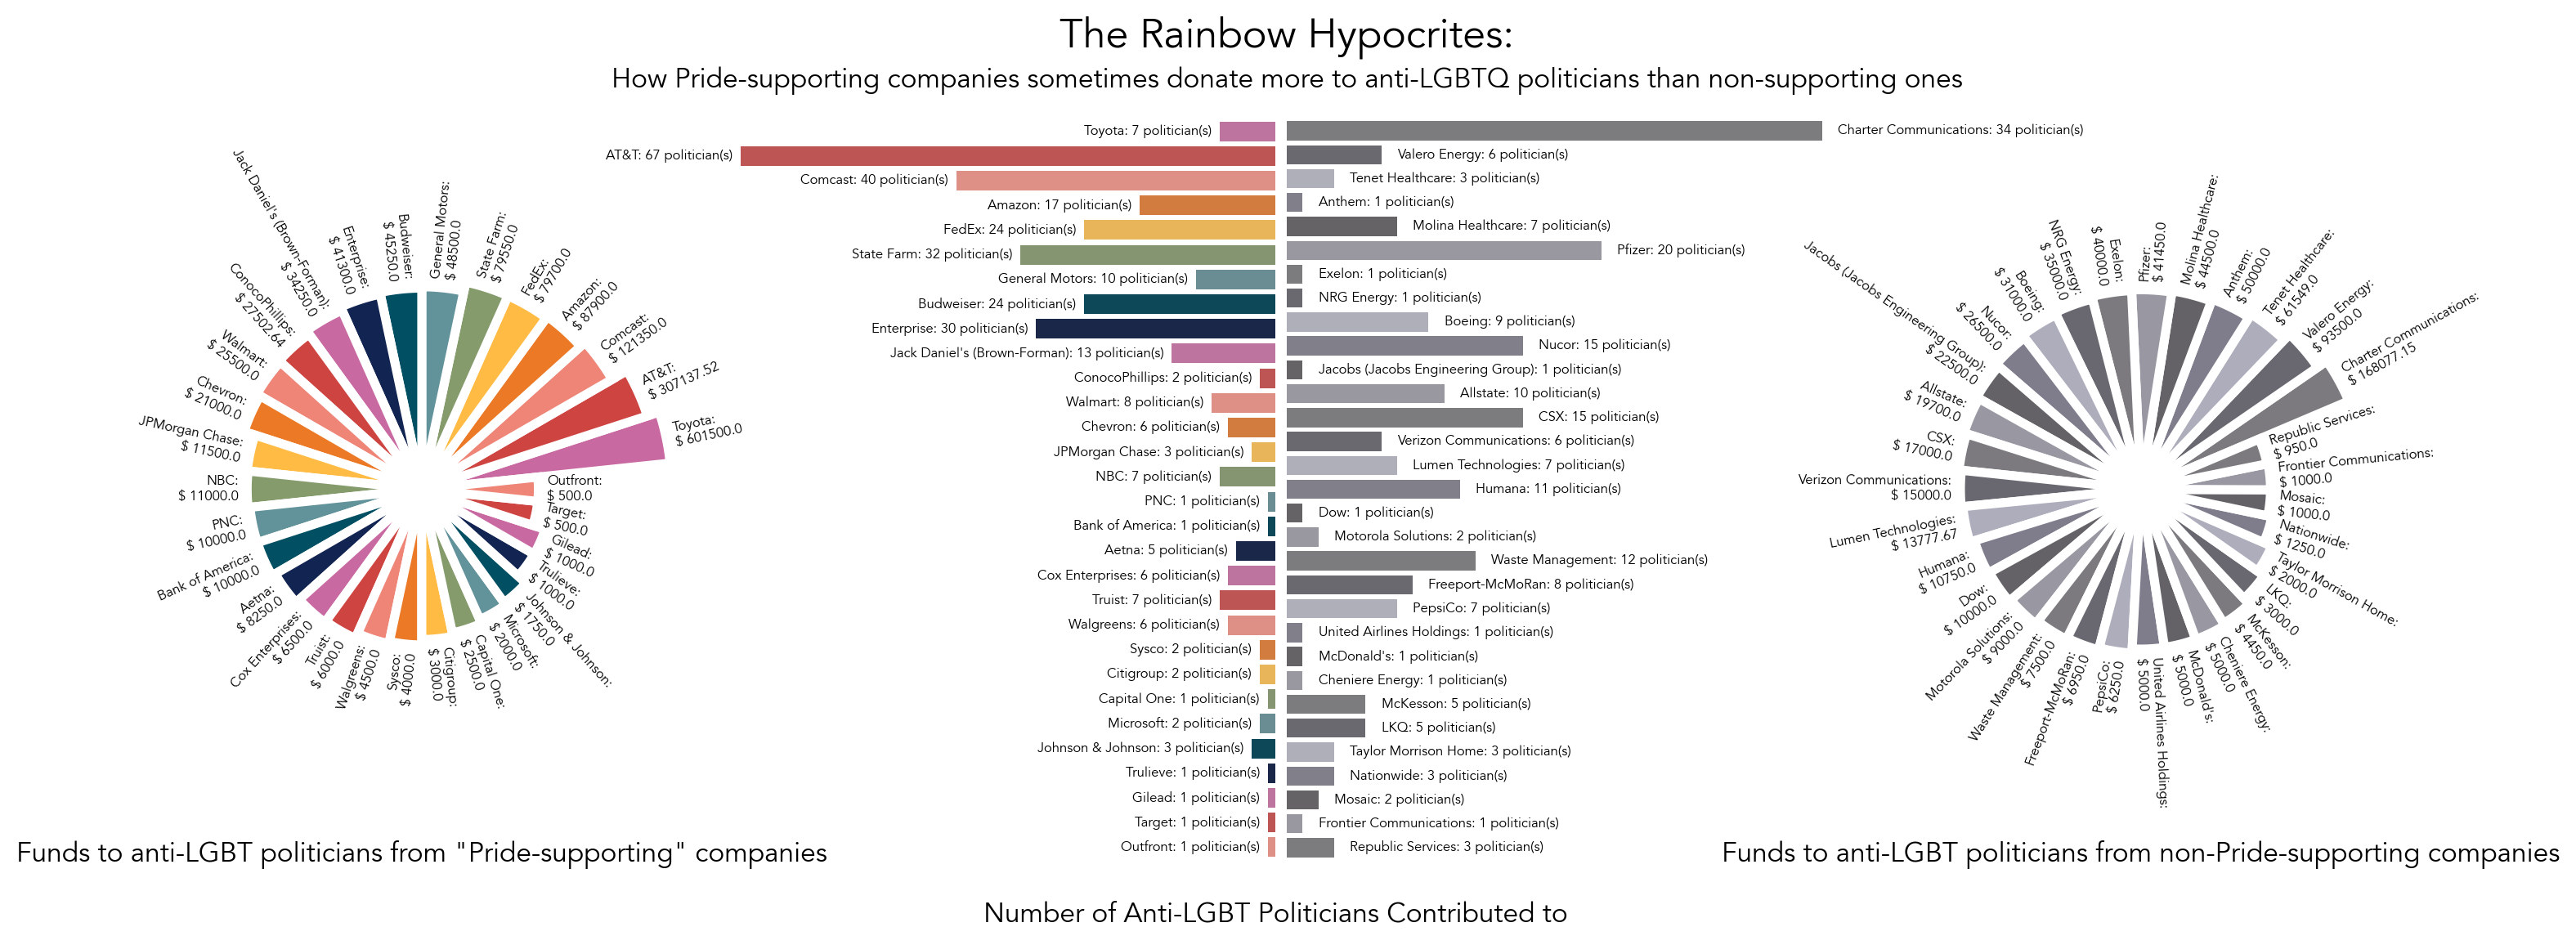

In [64]:
# Initialize plot with polar coordinates.
fig = plt.figure(dpi=200, figsize=(18, 6), facecolor='w')
plt.rcParams['axes.titlepad'] = -300


# ---------------------------
# Draw the first subplot
ax1 = plt.subplot(1,4,1, polar=True);
df1 = df[df['Pride?'] == True]
plt.axis('off')

# Set the coordinates limits
upperLimit = df1['Amount Contributed Across States'].max() - 100
lowerLimit = 0

# Compute max and min in the dataset
max = df1['Amount Contributed Across States'].max()

# Bar heights
# 0 in the dataset will be converted to the lowerLimit
# The maximum will be converted to the upperLimit
slope = (max - lowerLimit) / max
# Log scale for heights
heights = np.log10(slope * df1['Amount Contributed Across States'] + lowerLimit)

# Compute the width of each bar. In total we have 2*Pi = 360°
width = 2*np.pi / len(df1.index)

# Compute the angle each bar is centered on:
indexes = list(range(1, len(df1.index)+1))
angles = [element * width for element in indexes]


# Draw bars
bars = ax1.bar(
    x=angles, 
    height=heights, 
    width=width, 
    bottom=lowerLimit,
    linewidth=4, 
    edgecolor="white",
    #color="#61a4b2",
    color=["#c969a1", "#ce4441", "#ee8577", "#eb7926",
           "#ffbb44", "#859b6c", "#62929a", "#004f63", "#122451"]
)

ax1.set_rmax(6.5)

# little space between the bar and the label
labelPadding = 0.2

# Add labels
for bar, angle, height, label, num in zip(bars, angles, heights, 
                                          df1["Company"], 
                                          df1['Amount Contributed Across States']):

    # Labels are rotated. Rotation must be specified in degrees :(
    rotation = np.rad2deg(angle)

    # Flip some labels upside down
    alignment = ""
    if angle >= np.pi/2 and angle < 3*np.pi/2:
        alignment = "right"
        rotation = rotation + 180
    else: 
        alignment = "left"

    # Finally add the labels
    ax1.text(
        x=angle, 
        y=lowerLimit + bar.get_height() + labelPadding, 
        s=f'{label}:\n\$ {num}', 
        ha=alignment, 
        va='center', 
        rotation=rotation, 
        rotation_mode="anchor",
        fontsize=6) 
    
ax1.set_title('Funds to anti-LGBT politicians from \"Pride-supporting\" companies')
# ----------------


# ---------------------------
# Draw the second subplot
ax2 = plt.subplot(1,4,4, polar=True);
df2 = df[df['Pride?'] == False].iloc[:-3:3]  # Only sample some rows
plt.axis('off')

# Set the coordinates limits
upperLimit = df1['Amount Contributed Across States'].max() - 100
lowerLimit = 0

# Compute max and min in the dataset
max = df1['Amount Contributed Across States'].max()

# Bar heights
# 0 in the dataset will be converted to the lowerLimit
# The maximum will be converted to the upperLimit
slope = (max - lowerLimit) / max
# Log scale for heights
heights = np.log10(slope * df2['Amount Contributed Across States'] + lowerLimit)

# Compute the width of each bar. In total we have 2*Pi = 360°
width = 2*np.pi / len(df2.index)

# Compute the angle each bar is centered on:
indexes = list(range(1, len(df2.index)+1))
angles = [(element * width + 0.3) for element in indexes]


# Draw bars
bars = ax2.bar(
    x=angles, 
    height=heights, 
    width=width, 
    bottom=lowerLimit,
    linewidth=4, 
    edgecolor="white",
    #color="#61a4b2",
    color=['#7c7a7f', '#696870', '#adadbc',
           '#7f7d8c', '#656267', '#9897a2']
)

ax2.set_rmax(6.5)


# little space between the bar and the label
labelPadding = 0.2

# Add labels
for bar, angle, height, label, num in zip(bars, angles, heights, 
                                          df2["Company"], 
                                          df2['Amount Contributed Across States']):

    # Labels are rotated. Rotation must be specified in degrees :(
    rotation = np.rad2deg(angle)

    # Flip some labels upside down
    alignment = ""
    if angle >= np.pi/2 and angle < 3*np.pi/2:
        alignment = "right"
        rotation = rotation + 180
    else: 
        alignment = "left"

    # Finally add the labels
    ax2.text(
        x=angle, 
        y=lowerLimit + bar.get_height() + labelPadding, 
        s=f'{label}:\n\$ {num}', 
        ha=alignment, 
        va='center', 
        rotation=rotation, 
        rotation_mode="anchor",
        fontsize=6) 
    
ax2.set_title('Funds to anti-LGBT politicians from non-Pride-supporting companies')
# ----------------

# ----------------
# Draw a barplot in the middle to highlight the differences
ax3 = plt.subplot(1,4,2)
plt.axis('off')

# Invert the bars
df1['# of Politicians Contributed to'] = df1['# of Politicians Contributed to'] * (-1)

pridebars = sns.barplot(
    x="# of Politicians Contributed to", 
    y="Company", 
    data=df1, 
    #estimator=sum, 
    ci=None,
    ax=ax3,
    palette=["#c969a1", "#ce4441", "#ee8577", "#eb7926",
           "#ffbb44", "#859b6c", "#62929a", "#004f63", "#122451"],
    )

rects = ax3.patches  # Getting location info for labelling
labels = df1['Company']
nums = df1['# of Politicians Contributed to']

for rect, label, num in zip(rects, labels, nums):
    height = rect.get_y()
    ax3.text(
        num - 1, height + 0.4,
         f'{label}: {num * (-1)} politician(s)', 
         ha="right", 
         va="center",
         fontsize=6,
         color='k'
    )

#ax3.set_xlabel('Number of Politicians Contributed to')
ax3.text(0, 32,
         'Number of Anti-LGBT Politicians Contributed to',
         ha='center',
         fontsize=12)  # This title works for both ax3 and 4

# ----------------


# ----------------
# Draw a barplot in the middle to highlight the differences
ax4 = plt.subplot(1,4,3)
plt.axis('off')

pridebars = sns.barplot(
    x="# of Politicians Contributed to", 
    y="Company", 
    data=df2, 
    #estimator=sum, 
    ci=None,
    ax=ax4,
    palette=['#7c7a7f', '#696870', '#adadbc',
           '#7f7d8c', '#656267', '#9897a2'],
    )

rects = ax4.patches  # Getting location info for labelling
labels = df2['Company']
nums = df2['# of Politicians Contributed to']

for rect, label, num in zip(rects, labels, nums):
    height = rect.get_y()
    ax4.text(
        num + 1, height + 0.4,
         f'{label}: {num} politician(s)', 
         ha="left", 
         va="center",
         fontsize=6,
         color='k'
    )

# -------------
plt.text(0, -3, 
         'The Rainbow Hypocrites:',
         ha='center',
         va='bottom',
         fontsize=18)

plt.text(0, -1.5,
         'How Pride-supporting companies sometimes donate more to anti-LGBTQ politicians than non-supporting ones',
         ha='center',
         va='bottom',
         fontsize=12)
plt.subplots_adjust(wspace=0.02)
plt.show()